In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt    
import os
import random

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
trainDataset = datasets.EMNIST(
    root='./data',
    split='letters',
    train=True,
    download=True,
    transform=transform
)
testDataset = datasets.EMNIST(
    root='./data',
    split='letters',
    train=False,
    download=True,
    transform=transform
)
batchSize = 32
trainCNNLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=True)
testCNNLoader = DataLoader(testDataset, batch_size=batchSize, shuffle=False)

In [ ]:
epochs = 10
patience = 1
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()

In [ ]:
from model.CNN import CNN, BetterCNN
model = BetterCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [4]:

from utils.train_model import train
from utils.eval_model import evaluate, evaluate_CNN
model = train(
    model=model, 
    x=trainCNNLoader, 
    y=None, 
    optimizer=optimizer, 
    criterion=criterion, 
    epochs=epochs, 
    patience=patience, 
    device=device
)
correctPercent, wrongIndexes = evaluate_CNN(
    model=model, 
    x=testCNNLoader, 
    y=None, 
    criterion=criterion, 
    device=device
)

Early stopping at epoch 2


In [5]:
from utils.draw_figure import prepare_data_for_draw_CNN_incorrect_predictions, draw_CNN_incorrect_predictions
dataForFigure = prepare_data_for_draw_CNN_incorrect_predictions(testDataset, wrongIndexes)

In [10]:
draw_CNN_incorrect_predictions(dataForFigure, figurePath='./figures', fileName='cnn_wrong_predictions')

0

In [6]:
data = dataForFigure
xAll = data['x']
yAll = data['y']
predictAll = data['predict']
i=0
x = xAll[i]
y = yAll[i]
predict = predictAll[i]

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

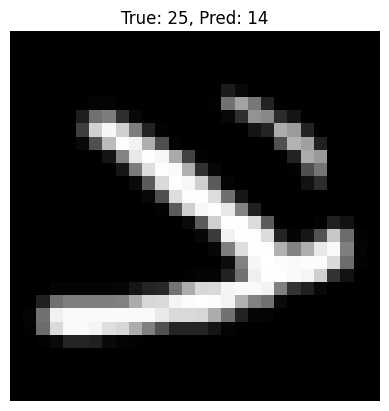

In [7]:
plt.figure()
plt.imshow(x.squeeze(), cmap='gray')
plt.title(f"True: {y}, Pred: {predict}")
plt.axis('off')

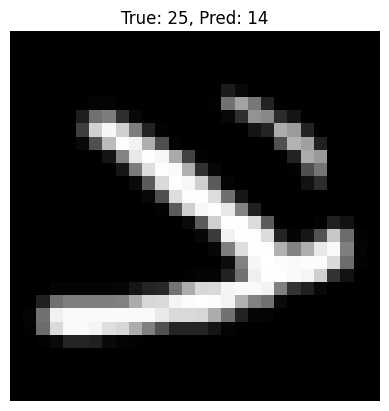

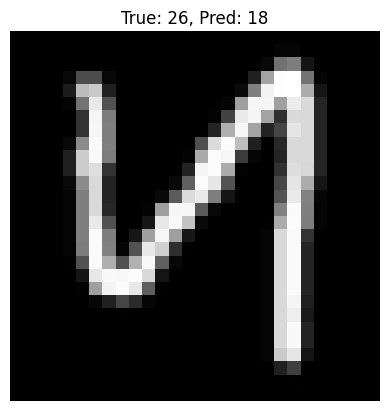

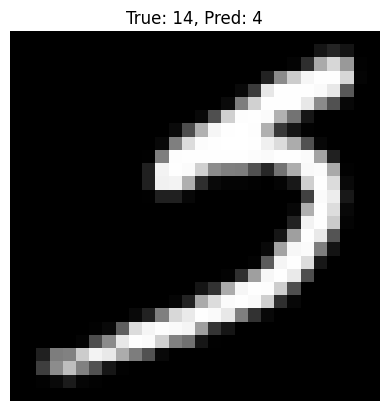

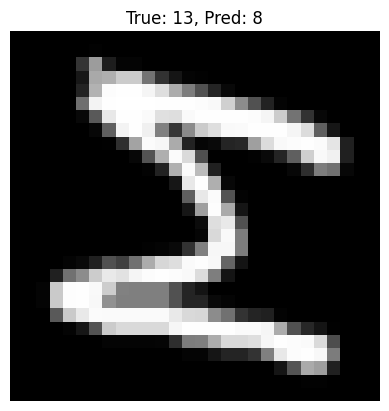

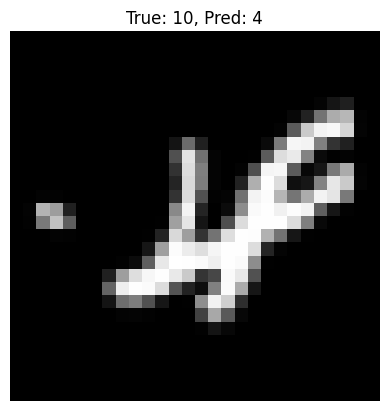

In [8]:

for i in range(len(xAll)):
    x = xAll[i]
    y = yAll[i]
    predict = predictAll[i]
    plt.figure()
    plt.imshow(x.squeeze(), cmap='gray')
    plt.title(f"True: {y}, Pred: {predict}")
    plt.axis('off')

In [7]:
# ===================== 4. 训练和测试函数 =====================
model = train(
    model=model, 
    x=train_loader, 
    y=None, 
    optimizer=optimizer, 
    criterion=criterion, 
    epochs=5, 
    patience=1, 
    device='mps'
)

Early stopping at epoch 2


In [8]:
correctPercent, wrongIndexes = evaluate_CNN(
    model=model, 
    x=test_loader, 
    y=None, 
    criterion=criterion, 
    device='mps'
)

In [ ]:
sampled_wrong = random.sample(wrongIndexes, min(5, len(wrongIndexes)))
xAll = []
yAll = []
preddictAll = []

In [16]:
for i in range(len(testDataset)):
    yAll.append(testDataset[i][1])

In [19]:
set(yAll)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26}

In [24]:
chr(ord('A') + 2)

'C'

In [21]:
yAll

[26, 8, 6, 26, 26]

In [22]:
sampled_wrong

[(20243, 21, 26), (5818, 4, 8), (4577, 7, 6), (20556, 9, 26), (20559, 24, 26)]

In [ ]:
    os.makedirs('figure', exist_ok=True)
    sampled_wrong = random.sample(wrongIndexes, min(5, len(wrongIndexes)))
    for idx in sampled_wrong:
        img, true_label = testDataset[idx]
        img_np = img.squeeze().numpy()
        model.eval()
        with torch.no_grad():
            input_img = img.unsqueeze(0).to(device)
            output = model(input_img)
            pred_label = output.argmax(dim=1).item()
        plt.figure()
        plt.imshow(img_np, cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
        plt.savefig(f'figure/wrong_pred_{idx}.png')
        plt.close()



In [36]:
# ===================== 5. 主训练循环 =====================
for epoch in range(5):
    loss = train_one_epoch()
    acc = evaluate()
    print(f"Epoch {epoch+1}: loss={loss:.4f}, test_acc={acc:.4f}")

# torch.save(model.state_dict(), "emnist_simplecnn.pth")
print("训练完成，模型已保存。")

Epoch 1: loss=1.0398, test_acc=0.8086
Epoch 2: loss=0.5621, test_acc=0.8489
Epoch 3: loss=0.4684, test_acc=0.8575
Epoch 4: loss=0.4240, test_acc=0.8727
Epoch 5: loss=0.3946, test_acc=0.8705
训练完成，模型已保存。
